## Dependencies

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Importing data

In [31]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

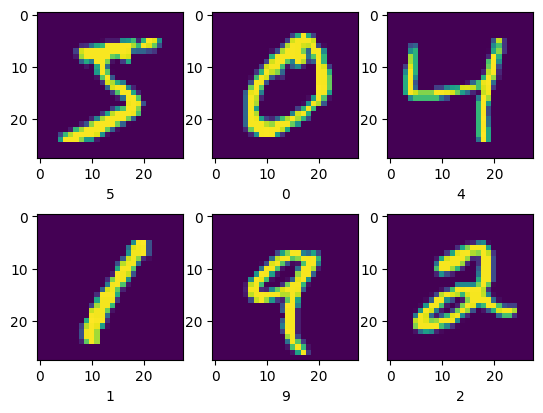

In [32]:
fig, ax = plt.subplots(2, 3)
for i in range(6):
    ax[i//3][i%3].imshow(X_train[i])
    ax[i//3][i%3].set_xlabel(y_train[i])

## Pre-processing data

In [33]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [34]:
y_train = (encoder.fit_transform(y_train.reshape(-1, 1))).toarray()
y_test = encoder.transform(y_test.reshape(-1, 1)).toarray()

## Data Augmentation

In [35]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(factor=0.1, fill_mode='wrap'),
    tf.keras.layers.RandomZoom(height_factor=0.6, width_factor=0.6, fill_mode='constant')
])

Text(0.5, 0, 'Augmented')

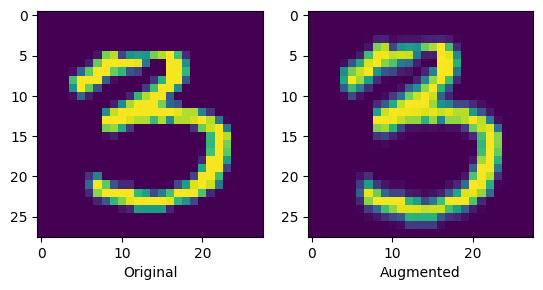

In [36]:
from random import randint
idx = randint(0, 59999)
teste = data_augmentation(np.array([X_train[idx]]))

fig, ax = plt.subplots(1, 2)

ax[0].imshow(X_train[idx])
ax[0].set_xlabel('Original')
ax[1].imshow(teste[0])
ax[1].set_xlabel('Augmented')

In [37]:
X_train = X_train/255.0
X_test = X_test/255.0

## Building model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(height_factor=0.6, width_factor=0.6, fill_mode='constant'),
    tf.keras.layers.Conv2D(input_shape=(28,28,1),filters=8, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=8, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.GlobalMaxPool2D(),
    tf.keras.layers.Dense(units=120, activation='relu'),
    tf.keras.layers.Dense(units=84, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

model.build((None, 28, 28, 1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_1 (RandomRo  (None, 28, 28, 1)        0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 8)         584       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 8)         

## Training

In [ ]:
checkpoint_path = 'models/cp.ckpt'
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
model.fit(X_train, y_train, epochs=100, callbacks=cp_callback)

2023-09-07 12:28:32.507433: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/100
1875/1875 [==============================] - ETA: 0s - loss: 1.6139 - categorical_accuracy: 0.4212
Epoch 1: saving model to models/cp.ckpt
1875/1875 [==============================] - 49s 24ms/step - loss: 1.6139 - categorical_accuracy: 0.4212
Epoch 2/100
1873/1875 [============================>.] - ETA: 0s - loss: 1.2764 - categorical_accuracy: 0.5521
Epoch 2: saving model to models/cp.ckpt
1875/1875 [==============================] - 57s 30ms/step - loss: 1.2764 - categorical_accuracy: 0.5522
Epoch 3/100
1873/1875 [============================>.] - ETA: 0s - loss: 1.1681 - categorical_accuracy: 0.5935
Epoch 3: saving model to models/cp.ckpt
1875/1875 [==============================] - 46s 24ms/step - loss: 1.1679 - categorical_accuracy: 0.5936
Epoch 4/100
1874/1875 [============================>.] - ETA: 0s - loss: 1.0846 - categorical_accuracy: 0.6271
Epoch 4: saving model to models/cp.ckpt
1875/1875 [==============================] - 48s 25ms/step - loss: 1.0846 - categ

KeyboardInterrupt: 

## Evaluating

In [ ]:
model.load_weights('models/cp.ckpt')

In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [ ]:
y_test = encoder.inverse_transform(y_test)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
acc

0.7258

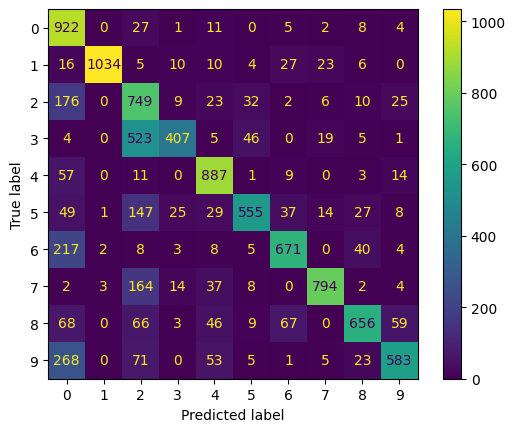

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()